In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
import re
import glob
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import os
import re
import glob
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



In [2]:
element_groups = {
    'alkali metals': ['Li', 'Na', 'K', 'Rb', 'Cs', 'Fr'],
    'alkaline earth metals': ['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Ra'],
    'halogens': ['F', 'Cl', 'Br', 'I', 'At'],
    'noble gases': ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Rn'],
    'transition metals': ['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og'],
    'lanthanides': ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'],
    'actinides': ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr'],
    'boron group': ['B', 'Al', 'Ga', 'In', 'Tl'],
    'carbon group': ['C', 'Si', 'Ge', 'Sn', 'Pb'],
    'pnictogens': ['N', 'P', 'As', 'Sb', 'Bi'],
    'chalcogens': ['O', 'S', 'Se', 'Te']
}

elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']

all_categorized_elements = [item for sublist in element_groups.values() for item in sublist]
uncategorized_elements = [element for element in elements if element not in all_categorized_elements]

element_groups['uncategorized'] = uncategorized_elements


# LSTM Model

In [3]:

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim
import pandas as pd
import numpy as np
import os
import glob
from gensim.models import Word2Vec
import re

class FineTuningModel(nn.Module):
    def __init__(self, embedding_weights, hidden_dim, output_dim, num_layers=2, dropout=0.0):
        super(FineTuningModel, self).__init__()
        vocab_size, embedding_dim = embedding_weights.shape
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight.data.copy_(torch.from_numpy(embedding_weights))
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x, lengths):
        x = self.embedding(x)  # Embed the input data
        packed_x = pack_padded_sequence(x, lengths, batch_first=True)
        _, (h_n, _) = self.lstm(packed_x)
        out = self.fc(self.dropout(h_n[-1]))
        return out



import gensim


# Visualising embeddings




findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


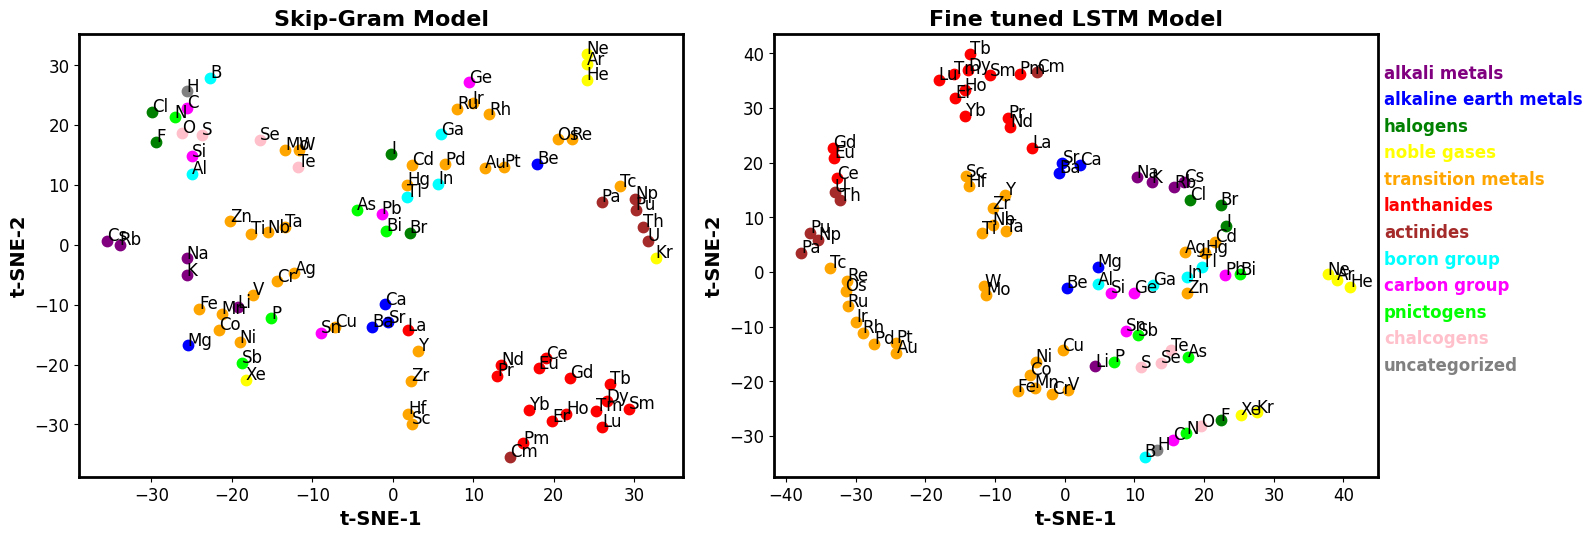

In [5]:
import os
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
from glob import glob
import torch
import matplotlib.font_manager as fm
from adjustText import adjust_text

# Set font properties
title_font = fm.FontProperties(family='Arial', style='normal', size=16, weight='bold')
label_font = fm.FontProperties(family='Arial', style='normal', size=14, weight='bold')
tick_font = fm.FontProperties(family='Arial', style='normal', size=12)
legend_font = fm.FontProperties(family='Arial', style='normal', size=12)

# Modified function to plot on specific axes
def visualize_embeddings(model_gen, embedding_model, elements, element_groups, ax, title, display_group_names):
    indices = [model_gen.wv.key_to_index[element] for element in elements if element in model_gen.wv.key_to_index]
    words = [element for element in elements if element in model_gen.wv.key_to_index]
    word_vectors = embedding_model.vectors[indices]

    tsne = TSNE(n_components=2,perplexity=5, random_state=0)
    word_vectors_2d = tsne.fit_transform(word_vectors)

    group_colors = {
    'alkali metals': 'purple',
    'alkaline earth metals': 'blue',
    'halogens': 'green',
    'noble gases': 'yellow',
    'transition metals': 'orange',
    'lanthanides': 'red',
    'actinides': 'brown',
    'boron group': 'cyan',
    'carbon group': 'magenta',
    'pnictogens': 'lime',
    'chalcogens': 'pink',
    'uncategorized': 'gray'
}

   
    for group, elements in element_groups.items():
        group_indices = [i for i, word in enumerate(words) if word in elements]
        group_vectors = word_vectors_2d[group_indices]
        group_words = [words[i] for i in group_indices]
        color = group_colors.get(group, 'gray')
        ax.scatter(group_vectors[:, 0], group_vectors[:, 1], color=color, s=56)
        for i, word in enumerate(group_words):
            ax.annotate(word, xy=(group_vectors[i, 0], group_vectors[i, 1]), fontsize=12)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)

    ax.set_xlabel("t-SNE-1", fontproperties=label_font)
    ax.set_ylabel("t-SNE-2", fontproperties=label_font)
    ax.set_title(title, fontproperties=title_font)

    ax.tick_params(axis='both', which='major', labelsize=12)

  
    if display_group_names:
        for i, (group, color) in enumerate(group_colors.items()):
            ax.text(1.01, 0.9 - i * 0.06, group, color=color, transform=ax.transAxes, fontsize=12, weight='bold')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



def extract_parameters_from_filename(filename):
    gensim_params = re.search(r"vec(\d+)_win(\d+)_mc(\d+)_ep(\d+)_sg(\d+)", filename)
    lstm_params = re.search(r"_hidden(\d+)_layers(\d+)_dropout(\d+\.?\d*)", filename)
    
    # print(gensim_params,lstm_params)
    return {
        "gensim": {
            "vector_length": int(gensim_params.group(1)),
            "window_length": int(gensim_params.group(2)),
            "min_count": int(gensim_params.group(3)),
            "epochs": int(gensim_params.group(4)),
            "sg": int(gensim_params.group(5)),
        },
        "lstm": {
            "hidden_layer": int(lstm_params.group(1)),
            "lstm_layers": int(lstm_params.group(2)),
            "dropout": float(lstm_params.group(3)),
        }
    }

def load_and_visualize_models(lstm_model_dir, gensim_model_dir, elements, element_groups):
    lstm_model_files = glob(os.path.join(lstm_model_dir, "*vec100_win20_mc1_ep150_sg1_ver12.model_hidden200_layers4_dropout0.1*.pth"))
    gensim_model_files = glob(os.path.join(gensim_model_dir, "*.model"))

    
    
    
    for lstm_model_file in lstm_model_files:
        lstm_model_name = os.path.basename(lstm_model_file)
        params = extract_parameters_from_filename(lstm_model_name)

        gensim_model_file = next((f for f in gensim_model_files if os.path.basename(f).startswith(lstm_model_name.split("_hidden")[0])), None)
        if gensim_model_file is None:
            print(f"No corresponding Gensim model found for {lstm_model_name}.")
            continue

        gensim_model_name = os.path.basename(gensim_model_file)
        model_gen = Word2Vec.load(gensim_model_file)

        # Get the embeddings from the Gensim model
        embedding_weights_gensim = np.zeros((len(model_gen.wv.key_to_index), model_gen.vector_size))
        for word, idx in model_gen.wv.key_to_index.items():
            embedding_weights_gensim[idx] = model_gen.wv[word]

        # Initialize LSTM model using parameters from the filename
        input_dim = embedding_weights_gensim.shape[1]
        output_dim = 15  # Set this as per your needs
        hidden_dim = params['lstm']['hidden_layer']
        num_layers = params['lstm']['lstm_layers']
        dropout = params['lstm']['dropout']
        model_lstm = FineTuningModel(embedding_weights_gensim, hidden_dim, output_dim, num_layers=num_layers, dropout=dropout)
        model_lstm.load_state_dict(torch.load(lstm_model_file))
        model_lstm.eval()

        fig, axs = plt.subplots(1, 2, figsize=(16, 6))

        # Get the embeddings from the LSTM model
        embedding_weights_lstm = model_lstm.embedding.weight.data
        embedding_model_lstm = gensim.models.KeyedVectors(vector_size=model_gen.vector_size)
        embedding_model_lstm.add_vectors(range(len(model_gen.wv.key_to_index)), embedding_weights_lstm.cpu().numpy())
        
        visualize_embeddings(model_gen, embedding_model_lstm, elements, element_groups, axs[1], "Fine tuned LSTM Model", display_group_names=True)

        embedding_model_gensim = gensim.models.KeyedVectors(vector_size=model_gen.vector_size)
        embedding_model_gensim.add_vectors(range(len(model_gen.wv.key_to_index)), embedding_weights_gensim)
        visualize_embeddings(model_gen, embedding_model_gensim, elements, element_groups, axs[0], "Skip-Gram Model", display_group_names=False)


        title_gensim = "Gensim parameters: " + " ".join([f"{k}: {v}" for k, v in params['gensim'].items()])
        title_lstm = "LSTM parameters: " + " ".join([f"{k}: {v}" for k, v in params['lstm'].items()])
        
        plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.1, right=0.55, top=0.9, bottom=0.1)
        plt.tight_layout()  # Adjust the positions of the subplots, labels, and title to fit into the figure area
        plt.subplots_adjust(top=.85, wspace=0.15)  # Adjust the top space and the space between subplots

        # plt.savefig('name.jpg', dpi=300)
        plt.show()

  

# 
load_and_visualize_models(
    lstm_model_dir="trained_lstm_models/",
    gensim_model_dir="trained_gensim_models/",
    elements=elements ,  # Add your elements here
    element_groups=element_groups ,  # Add your element groups here
)


# Saving the embeddings as csv

In [6]:
import pandas as pd

def embeddings_to_dataframe_from_model_gen(model_gen):
    # Get all words from the model_gen vocabulary
    words = list(model_gen.wv.key_to_index.keys())
    
    # Extract embeddings of all words from model_gen
    word_vectors = model_gen.wv.vectors

    # Construct DataFrame
    df = pd.DataFrame(word_vectors.T, columns=words)  

    return df

def embeddings_to_dataframe_from_embedding_model(embedding_model, model_gen):
    # Get all words from the model_gen vocabulary
    words = list(model_gen.wv.key_to_index.keys())

    # Extract embeddings of all words from embedding_model
    word_vectors = embedding_model.vectors

    # Construct DataFrame
    df = pd.DataFrame(word_vectors.T, columns=words)  

    return df

def load_and_visualize_models(lstm_model_dir, gensim_model_dir, elements, element_groups):
    lstm_model_files = glob(os.path.join(lstm_model_dir, "*vec100_win20_mc1_ep150_sg1_ver12.model_hidden200_layers4_dropout0.1*.pth"))
    gensim_model_files = glob(os.path.join(gensim_model_dir, "*.model"))

    for lstm_model_file in lstm_model_files:
        lstm_model_name = os.path.basename(lstm_model_file)

        params = extract_parameters_from_filename(lstm_model_name)
        gensim_model_file = next((f for f in gensim_model_files if os.path.basename(f).startswith(lstm_model_name.split("_hidden")[0])), None)
        if gensim_model_file is None:
            print(f"No corresponding Gensim model found for {lstm_model_name}.")
            continue

        gensim_model_name = os.path.basename(gensim_model_file)
        model_gen = Word2Vec.load(gensim_model_file)

        # Get the embeddings from the Gensim model
        embedding_weights_gensim = np.zeros((len(model_gen.wv.key_to_index), model_gen.vector_size))
        for word, idx in model_gen.wv.key_to_index.items():
            embedding_weights_gensim[idx] = model_gen.wv[word]

        # Initialize LSTM model using parameters from the filename
        input_dim = embedding_weights_gensim.shape[1]
        output_dim = 15  # Set this as per your needs
        hidden_dim = params['lstm']['hidden_layer']
        num_layers = params['lstm']['lstm_layers']
        dropout = params['lstm']['dropout']
        model_lstm = FineTuningModel(embedding_weights_gensim, hidden_dim, output_dim, num_layers=num_layers, dropout=dropout)
        model_lstm.load_state_dict(torch.load(lstm_model_file))
        model_lstm.eval()


        # Get the embeddings from the LSTM model
        embedding_weights_lstm = model_lstm.embedding.weight.data
        embedding_model_lstm = gensim.models.KeyedVectors(vector_size=model_gen.vector_size)
        embedding_model_lstm.add_vectors(range(len(model_gen.wv.key_to_index)), embedding_weights_lstm.cpu().numpy())
        


        embedding_model_gensim = gensim.models.KeyedVectors(vector_size=model_gen.vector_size)
        embedding_model_gensim.add_vectors(range(len(model_gen.wv.key_to_index)), embedding_weights_gensim)

        df_embeddings_model_gen = embeddings_to_dataframe_from_model_gen(model_gen)
        # Save DataFrame to CSV
        df_embeddings_model_gen.to_csv('embeddings_embedding_model_gensim.csv', index=False)

        df_embeddings_embedding_model = embeddings_to_dataframe_from_embedding_model(embedding_model_lstm, model_gen)
        df_embeddings_embedding_model.to_csv('embeddings_embedding_model_LSTM.csv', index=False)


        print("DataFrame for model_gen:")
        print(df_embeddings_model_gen.head())

        print("\nDataFrame for embedding_model:")
        print(df_embeddings_embedding_model.head())



        # Call your function with appropriate parameters
load_and_visualize_models(
    lstm_model_dir="trained_lstm_models/",
    gensim_model_dir="trained_gensim_models/",
    elements=elements , 
    element_groups=element_groups , 
)



DataFrame for model_gen:
          O   0.00_ap   0.50_ap   0.25_ap   0.75_ap         4         2  \
0 -0.071371 -0.132050 -0.223316 -0.226356 -0.232789 -0.085545 -0.066470   
1 -0.332229 -0.584818 -0.571824 -0.427495 -0.439222  0.140339  0.057890   
2  0.112169 -0.045479 -0.117041 -0.260807 -0.287317 -0.216246 -0.050058   
3  0.304894  0.141104  0.167358  0.262945  0.265996  0.259127  0.152945   
4 -0.178946 -0.303377 -0.353465 -0.350291 -0.317383 -0.133640 -0.199812   

    0.33_ap   0.67_ap         1  ...   53.1_lc  100.7_lc       443       442  \
0 -0.044565 -0.046072 -0.067974  ... -0.190658 -0.679921 -0.701858 -0.470080   
1 -0.450223 -0.409343 -0.005655  ... -0.592626 -0.697659 -0.878238 -0.651450   
2  0.232318  0.257932 -0.052037  ...  0.599095  0.928396  0.673605  0.797562   
3  0.003121 -0.050465  0.143763  ... -0.087738 -0.186782  0.010738  0.031628   
4  0.055941  0.059618 -0.227005  ...  0.001797 -0.366383 -0.676627 -0.816788   

        441       440       439       438  